# Dask DataFrame

The Dask dataframe is composed by many smaller pandas DataFrames, split along the index. One Dask DataFrame operation triggers many operations on the constituent pandas DataFrames. Dask DataFrames are partitioned row-wise, grouping rows by index value for efficiency.

The dask.DataFrame API is almost identical to pandas DataFrame api (except that not all functions are provided).  They are very useful when:

- Data does not fit into memory.
- For accelerating long computations by using many cores
- Distributed computing on large datasets with standard pandas operations like groupby, join, and time series computations


They are not the best choice when:
- The dataset fits comfortably into RAM. Then Pandas is a better choice.
- The dataset doex not fit well in the pandas tabular model. Then dask.bag ot dask.array is a better choice.
- When the functions you need are not implemented in the Dask dataframe framework. Then dask.delayed is a better choice.

In [4]:
from dask.distributed import Client

client = Client(n_workers=2, threads_per_worker = 1, memory_limit='4G')
display(client)

/home/cristian/miniconda3/envs/dev/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33007 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33007/status,
Dashboard: http://127.0.0.1:33007/status,Workers: 2
Total threads: 2,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41667,Workers: 2
Dashboard: http://127.0.0.1:33007/status,Total threads: 2
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:41135,Total threads: 1
Dashboard: http://127.0.0.1:46621/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:37771,


In [4]:
%%time
import pandas as pd
df_pd = pd.read_csv('./yellow_tripdata_2015-01.csv', parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df_pd

CPU times: user 37.9 s, sys: 3.28 s, total: 41.2 s
Wall time: 41.1 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748981,1,2015-01-10 19:01:44,2015-01-10 19:05:40,2,1.00,-73.951988,40.786217,1,N,-73.953735,40.775162,1,5.5,0.0,0.5,1.25,0.0,0.3,7.55
12748982,1,2015-01-10 19:01:44,2015-01-10 19:07:26,2,0.80,-73.982742,40.728184,1,N,-73.974976,40.720013,1,6.0,0.0,0.5,2.00,0.0,0.3,8.80
12748983,1,2015-01-10 19:01:44,2015-01-10 19:15:01,1,3.40,-73.979324,40.749550,1,N,-73.969101,40.787800,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30
12748984,1,2015-01-10 19:01:44,2015-01-10 19:17:03,1,1.30,-73.999565,40.738483,1,N,-73.981819,40.737652,1,10.5,0.0,0.5,2.25,0.0,0.3,13.55


In [5]:
%%time
import dask.dataframe as dd
df_dd = dd.read_csv('./yellow_tripdata_2016-01.csv', parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'],blocksize=100e6)
df_dd

CPU times: user 222 µs, sys: 0 ns, total: 222 µs
Wall time: 228 µs


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=17,,,,,,,,,,,,,,,,,,,
,int64,datetime64[ns],datetime64[ns],int64,float64,float64,float64,int64,string,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


If we check the Dask DataFrame it is empy. This is becasue nothing is read into memory. All Dask functions are lazy evaluated. This means that no computation is actually computer until we call compute. Dask only creates the task graph (logic) of the computation but computes it only when necessary.


In [17]:
%%time
df_pd.head()

CPU times: user 533 µs, sys: 44 µs, total: 577 µs
Wall time: 520 µs


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [6]:
%%time
df_dd.head()

2024-04-08 20:44:16,990 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "/home/cristian/miniconda3/envs/dev/lib/python3.12/site-packages/distributed/protocol/core.py", line 175, in loads
    return msgpack.loads(
           ^^^^^^^^^^^^^^
  File "/home/cristian/miniconda3/envs/dev/lib/python3.12/site-packages/msgpack/fallback.py", line 128, in unpackb
    ret = unpacker._unpack()
          ^^^^^^^^^^^^^^^^^^
  File "/home/cristian/miniconda3/envs/dev/lib/python3.12/site-packages/msgpack/fallback.py", line 565, in _unpack
    ret.append(self._unpack(EX_CONSTRUCT))
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cristian/miniconda3/envs/dev/lib/python3.12/site-packages/msgpack/fallback.py", line 592, in _unpack
    ret[key] = self._unpack(EX_CONSTRUCT)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cristian/miniconda3/envs/dev/lib/python3.12/site-packages/msgpack/fallback.py", line 546, in _unpack
    typ, n, obj =

CancelledError: ('read_csv-blockwisehead-d932677cf0bbbbe754959b48a314d23f', 0)

When we call head Dask is slower because it has to read into memory the first couple of rows. Function head() actually triggers a computation.

In [19]:
df_dd.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

Unlike pandas.read_csv which reads in the entire file before inferring datatypes, dask.dataframe.read_csv only reads a sample from the beginning of the file (or first file if using a glob). These inferred datatypes are then enforced when reading all partitions.

The inferred data types can be incorrect. When this happens you have a few options:

* Specify dtypes directly using the dtype keyword. This is the recommended solution, as it's the least error prone (better to be explicit than implicit) and also the most performant.
* Increase the size of the sample keyword (in bytes)
* Use assume_missing to make dask assume that columns inferred
* to be int (which don't allow missing values) are actually floats (which do allow missing values). In our particular case this doesn't apply.

# When to use dask dataframes

Pandas is great for tabular datasets that fit in memory. A general rule of thumb for pandas is:

"Have 5 to 10 times as much RAM as the size of your dataset"
~ Wes McKinney (2017) in 10 things I hate about pandas

Here "size of dataset" means dataset size on the disk. Dask becomes useful when the datasets exceed the above rule.

If you have fewer data always use pandas. Splitting the data makes the computations run longer.

In [12]:
%%time
df_pd.trip_distance.max()

CPU times: user 21 ms, sys: 3.76 ms, total: 24.8 ms
Wall time: 23.6 ms


831.8

In [20]:
%time df_dd.trip_distance.max()

CPU times: user 4.45 ms, sys: 27 µs, total: 4.48 ms
Wall time: 4.47 ms


dd.Scalar<series-..., dtype=float64>

We get only the lazy evaluation. Dask returns an object, nothing is calculated.

To get the result we have to call compute.

In [21]:
%time df_dd.trip_distance.max().compute()

CPU times: user 338 ms, sys: 39 ms, total: 377 ms
Wall time: 7.79 s


831.8

When we do two computations that share some intermediate oprations like mean and standard deviation:

In [9]:
one_passenger = df_dd[df_dd.passenger_count == 1]
mean_fare = one_passenger.fare_amount.mean()
std_fare= one_passenger.fare_amount.std()

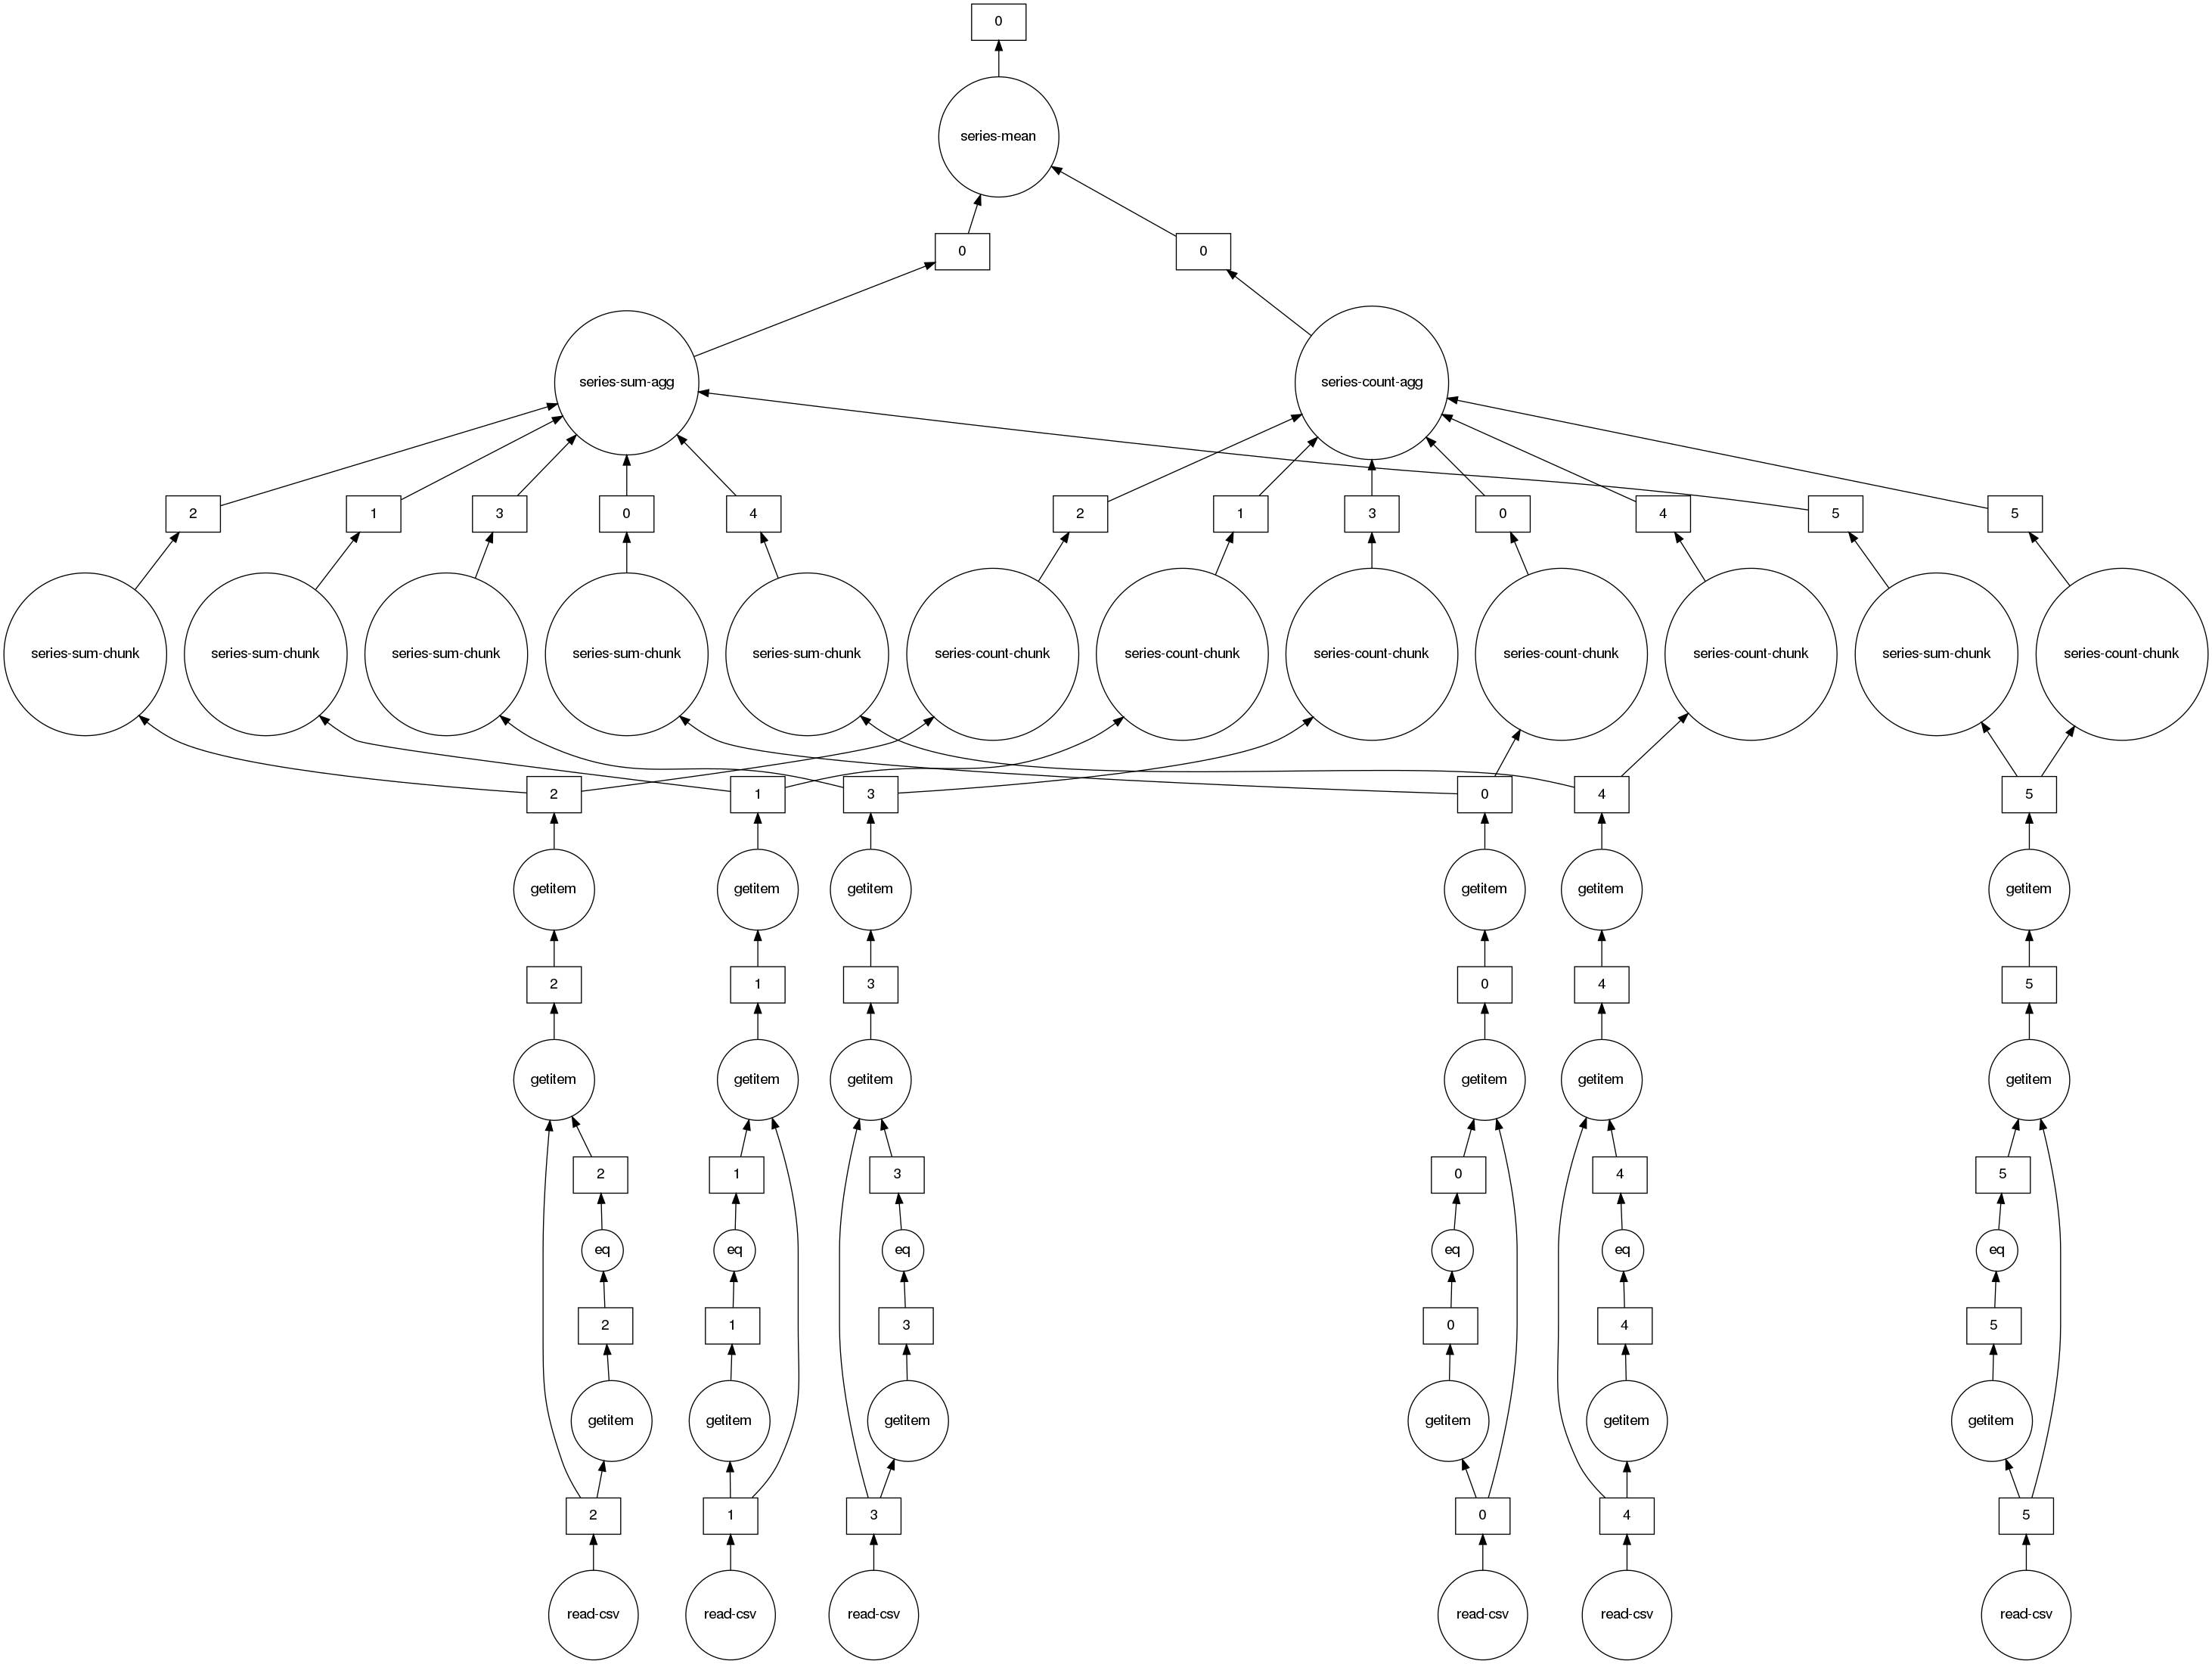

In [10]:
mean_fare.visualize()

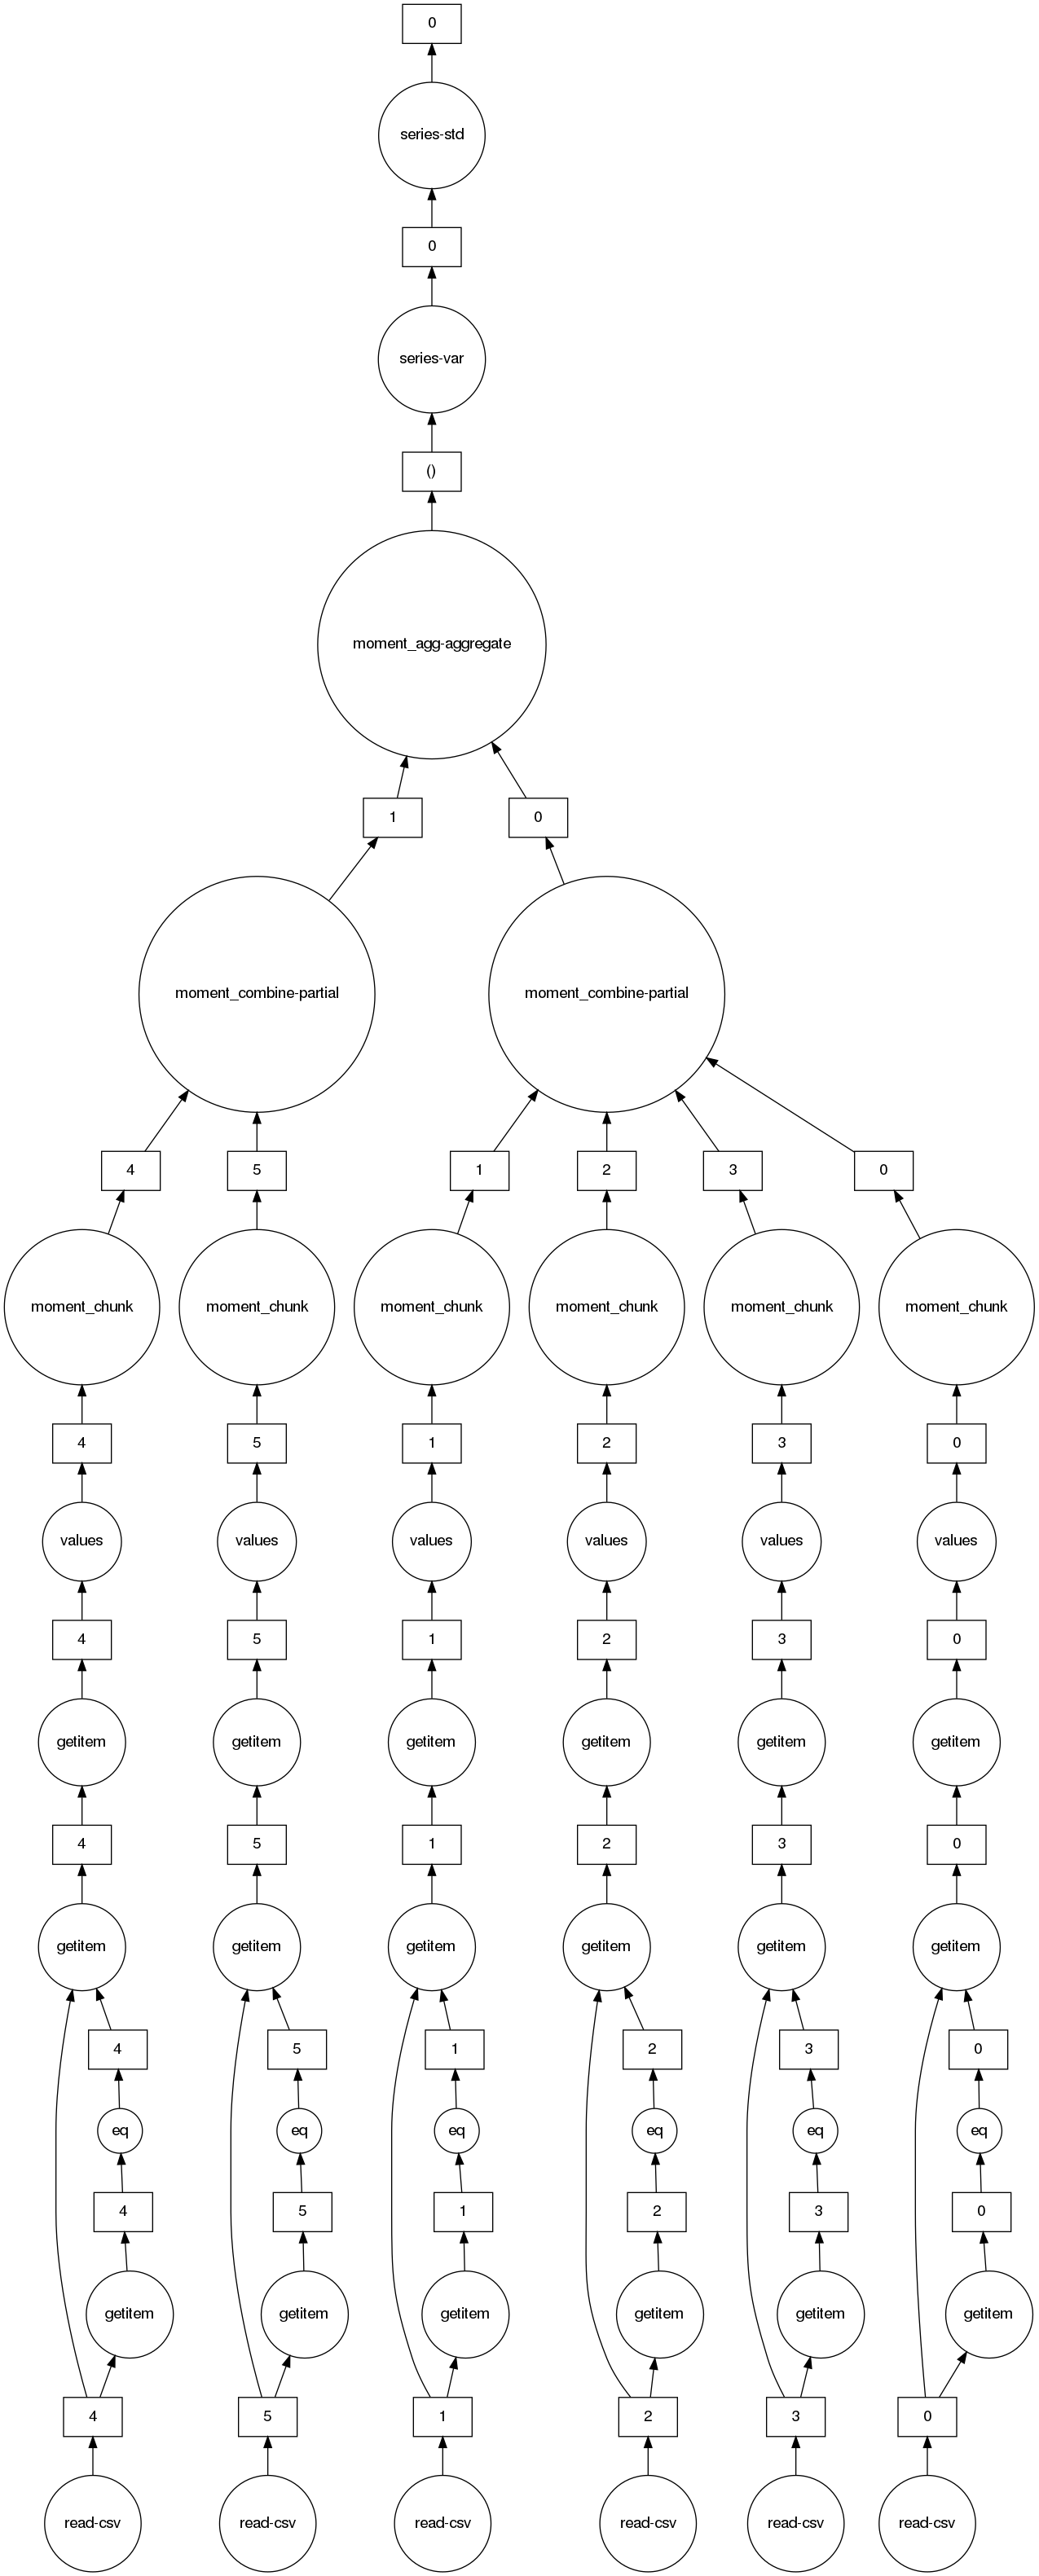

In [11]:
std_fare.visualize()

If we evaluate them separately. Dask creates two task graphs and evaluates them separately if we call compute on each one separately.

In [12]:
%%time
mean_fare = mean_fare.compute()
std_fare = std_fare.compute()

CPU times: user 47.3 s, sys: 6.26 s, total: 53.6 s
Wall time: 26.2 s


We can create only one task graph by calling compute on both by calling compute on both computations.

In [13]:
%%time
import dask
mean_fare, std_fare = dask.compute(mean_fare, std_fare)

CPU times: user 175 µs, sys: 25 µs, total: 200 µs
Wall time: 142 µs


This way the two results are merged when calling dask.compute, allowing shared operations to only be done once instead of twice.

## .persist() intelligently

We can force Dask to keep some data in distributed memory by calling the function persist(). We usually call persist on data that will be used for subsequent computations. All computations on persisted data are much faster. You can only call persist on data that fits into memory.

You can compare the following instances:

In [62]:
%%time
one_passenger.fare_amount.mean().compute()
one_passenger.fare_amount.std().compute()

CPU times: user 29.5 s, sys: 39 s, total: 1min 8s
Wall time: 32.3 s


307.4468576469022

If we pesist the data first.

In [63]:
one_passenger = df_dd[df_dd.passenger_count == 1].persist()

In [14]:
%%time
one_passenger.fare_amount.mean().compute()
one_passenger.fare_amount.std().compute()

CPU times: user 46 s, sys: 2.31 s, total: 48.3 s
Wall time: 23.4 s


307.4468576469022

How to persist data intelligently:
- Load data from files.
- Filter data to a particular subset.
- Set intelligent index.
- Apply complex queries.

## Some useful operations on dask DataFrames

Operations that require a shuffle are much more computationally expensive.Those operations are slow unless are performed on the index.

### Sorting Dask DataFrames

Let's sort the data in the table by the pickup time. Sort operations are very expensive in Dask, the more partitions we have the more time consuming they are.

In [15]:
%%time
df = df_dd.sort_values('tpep_pickup_datetime') 

CPU times: user 48.1 s, sys: 19.6 s, total: 1min 7s
Wall time: 29.4 s


Compared to Pandas.

In [16]:
%%time
df = df_pd.sort_values('tpep_pickup_datetime') 

CPU times: user 949 ms, sys: 56.6 ms, total: 1.01 s
Wall time: 1.01 s


Dask DataFrame can be optionally sorted along a single index column. Some operations against this column can be very fast. For example, if your dataset is sorted by time, you can quickly select data for a particular day, perform time series joins, etc.

"set_index" will make one column of the Dask DataFrame the index, and sort the data according to that index. It will by default estimate the data distribution of that column so that you end up with evenly sized partitions (Pandas DataFrames).

Most of the Dask operations run faster on indexed dataframes especially if we perform them on the index. 


In [17]:
%%time
ddf = df_dd.set_index(df_dd.tpep_pickup_datetime)

CPU times: user 47.9 s, sys: 30.1 s, total: 1min 17s
Wall time: 34.3 s


The following example is a selection based on the pickup time on the unindexed dataframe first.

In [18]:
%%time
df2 = ddf.loc['2019-01-01':'2019-02-01']

CPU times: user 4.79 ms, sys: 10 ms, total: 14.8 ms
Wall time: 50.3 ms


Compared to idexed DataFrame.

In [19]:
%%time
df2 = df_dd.loc['2019-01-01':'2019-02-01']

CPU times: user 4.64 ms, sys: 178 µs, total: 4.82 ms
Wall time: 4.65 ms


But is it worthed to sort the data first? Depends how much of data shuffling you are going to do because idexing is a very expensive operation:

### Groupby()

Dask GroupBy aggregations use the apply_concat_apply() method, which applies 3 functions, a chunk(), combine() and an aggregate() function to a dask.DataFrame.
More information can be found at https://saturncloud.io/docs/reference/dask_groupby_aggregations/

This class allows users to define their own custom aggregation in terms of operations on Pandas dataframes in a map-reduce style. You need to specify what operation to do on each chunk of data, how to combine those chunks of data together, and then how to finalize the result.

In the simplest case, we only use the chunk() and aggregate() steps.

In [91]:
df_dd.groupby('PULocationID')[['tip_amount']].mean().compute()

,tip_amount
PULocationID,
1,12.018094
2,4.308000
3,0.099600
4,1.470986
5,3.864000
...,...
204,10.833333
99,0.612500
176,7.025000


This aggregation is elegant in that each of these steps is implemented in the same way, by grouping by the employees and calculating the mean. Step 1 applies the chunk() function to each partition. This is an important step because its output is a reduction, and is much smaller than the original partition. Step 2 concatenates the outputs of Step 1 into a single dataframe, and then applies the aggregate() function to the result.

By default, groupby methods return an object with only 1 partition. This is to optimize performance, and assumes the groupby reduction returns an object that is small enough to fit into memory. If your returned object is larger than this, you can increase the number of output partitions using the split_out argument.

In [21]:
df_dd.groupby('PULocationID')[['tip_amount']].mean(split_out = 8)

,tip_amount
npartitions=8,
,float64
,...
...,...
,...
,...


### Joining two DataFrames

Joining two DataFrames can be either very expensive or very cheap depending on the situation. It is cheap to

- Join a Dask DataFrame with a Pandas DataFrame
- Join a Dask DataFrame with another Dask DataFrame of a single partition
- Join Dask DataFrames along their indexes.

It is expensive joining Dask DataFrames along columns that are not their index

DataFrame joins are a common and expensive computation that benefit from a variety of optimizations in different situations. Understanding how your data is laid out and what you’re trying to accomplish can have a large impact on performance.

In [1]:
import dask.dataframe as dd
df_ratings = dd.read_csv('../ratings.csv', blocksize=100e6)
df_ratings

,userId,movieId,rating,timestamp
npartitions=7,,,,
,int64,int64,float64,int64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [2]:
df_ratings = df_ratings.rename(columns ={'movieId':'id'})

In [3]:
df_credits = dd.read_csv('../credits.csv', blocksize=10e6)
df_credits

,cast,crew,id
npartitions=18,,,
,object,object,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [4]:
import pandas as pd
df_credits2 = pd.read_csv('../credits.csv')
df_credits2

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [5]:
%%time
df_ratings.merge(df_credits, how="left", on=["id"]).compute()

CPU times: user 34.8 s, sys: 5.14 s, total: 39.9 s
Wall time: 12.4 s


,userId,id,rating,timestamp,cast,crew
0,39994,59421,3.5,1215887758,"[{'cast_id': 1005, 'character': 'Kim Bok-Nam',...","[{'credit_id': '52fe498fc3a36847f81a07f5', 'de..."
1,39995,1237,5.0,1023741472,NaN,NaN
2,39995,1580,4.0,1024347137,"[{'cast_id': 1, 'character': 'Rupert Cadell', ...","[{'credit_id': '52fe4300c3a36847f8033163', 'de..."
3,39995,2052,3.0,1024348304,NaN,NaN
4,39995,3285,3.0,1023740492,NaN,NaN
...,...,...,...,...,...,...
1381066,156425,216,3.0,836829269,"[{'cast_id': 4, 'character': 'Emmi Kurowski', ...","[{'credit_id': '52fe4227c3a36847f80083cf', 'de..."
1381067,156425,440,3.0,836829438,"[{'cast_id': 17, 'character': 'Dallas Howard',...","[{'credit_id': '53957f680e0a266db40063f9', 'de..."
1381068,156425,480,5.0,836829378,"[{'cast_id': 3, 'character': 'Lalit Verma', 'c...","[{'credit_id': '52fe4248c3a36847f801222b', 'de..."
1381069,156425,595,2.0,836829010,"[{'cast_id': 8, 'character': 'Atticus Finch', ...","[{'credit_id': '52fe4259c3a36847f801770d', 'de..."


In [6]:
%%time
df_ratings.merge(df_credits2, how="left", on=["id"]).compute()

CPU times: user 20.3 s, sys: 18.3 s, total: 38.5 s
Wall time: 16.1 s


,userId,id,rating,timestamp,cast,crew
0,1,110,1.0,1425941529,"[{'cast_id': 9, 'character': 'Valentine Dussau...","[{'credit_id': '52fe4219c3a36847f8003dbd', 'de..."
1,1,147,4.5,1425942435,"[{'cast_id': 6, 'character': 'Antoine Doinel',...","[{'credit_id': '52fe421ec3a36847f8005651', 'de..."
2,1,858,5.0,1425941523,"[{'cast_id': 13, 'character': 'Sam Baldwin', '...","[{'credit_id': '52fe4283c3a36847f8024b93', 'de..."
3,1,1221,5.0,1425941546,NaN,NaN
4,1,1246,5.0,1425941556,"[{'cast_id': 24, 'character': 'Rocky Balboa', ...","[{'credit_id': '52fe42e9c3a36847f802c5f9', 'de..."
...,...,...,...,...,...,...
3662593,270896,58559,5.0,1257031564,"[{'cast_id': 1005, 'character': 'Brigitte', 'c...","[{'credit_id': '55c891c0c3a368040800040f', 'de..."
3662594,270896,60069,5.0,1257032032,NaN,NaN
3662595,270896,63082,4.5,1257031764,NaN,NaN
3662596,270896,64957,4.5,1257033990,NaN,NaN


Partitions should fit comfortably in memory (smaller than a gigabyte) but also not be too many. Every operation on every partition takes the central scheduler a few hundred microseconds to process.

In [7]:
df_credits = df_credits.repartition(npartitions = 1)

In [8]:
%%time
df_ratings.merge(df_credits, how="left", on=["id"]).compute()

CPU times: user 22 s, sys: 43.2 s, total: 1min 5s
Wall time: 26.3 s


,userId,id,rating,timestamp,cast,crew
0,1,110,1.0,1425941529,"[{'cast_id': 9, 'character': 'Valentine Dussau...","[{'credit_id': '52fe4219c3a36847f8003dbd', 'de..."
1,1,147,4.5,1425942435,"[{'cast_id': 6, 'character': 'Antoine Doinel',...","[{'credit_id': '52fe421ec3a36847f8005651', 'de..."
2,1,858,5.0,1425941523,"[{'cast_id': 13, 'character': 'Sam Baldwin', '...","[{'credit_id': '52fe4283c3a36847f8024b93', 'de..."
3,1,1221,5.0,1425941546,NaN,NaN
4,1,1246,5.0,1425941556,"[{'cast_id': 24, 'character': 'Rocky Balboa', ...","[{'credit_id': '52fe42e9c3a36847f802c5f9', 'de..."
...,...,...,...,...,...,...
3662593,270896,58559,5.0,1257031564,"[{'cast_id': 1005, 'character': 'Brigitte', 'c...","[{'credit_id': '55c891c0c3a368040800040f', 'de..."
3662594,270896,60069,5.0,1257032032,NaN,NaN
3662595,270896,63082,4.5,1257031764,NaN,NaN
3662596,270896,64957,4.5,1257033990,NaN,NaN


If we subset the data we still get the same number of partitions.

In [9]:
df_small = df_ratings[df_ratings.rating > 4.5]

In [10]:
df_small

,userId,id,rating,timestamp
npartitions=7,,,,
,int64,int64,float64,int64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [11]:
df_small.npartitions

7

**df_small** is a smaller dataset than the original one, but it is still split in 7 partitios.

In [12]:
emp2 = df_small.repartition(npartitions=2)

### Indexing into DataFrames

Select one colum:

In [15]:
df_dd['trip_distance']

Dask Series Structure:
npartitions=6
    float64
        ...
     ...   
        ...
        ...
Name: trip_distance, dtype: float64
Dask Name: getitem, 12 tasks

Select a few colums:

In [16]:
df_dd[['trip_distance', 'payment_type']]

,trip_distance,payment_type
npartitions=6,,
,float64,int64
,...,...
...,...,...
,...,...
,...,...


You can also specify the column number.

In [17]:
df_dd.iloc[:, [1, 0]]

,tpep_pickup_datetime,VendorID
npartitions=6,,
,datetime64[ns],int64
,...,...
...,...,...
,...,...
,...,...


Dask DataFrame does not track the length of partitions, making positional indexing with .iloc inefficient for selecting rows.

In [18]:
df_dd.iloc[[0, 2], [1]]

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

## map_partitions()

When you have data that are larger than memory, but you can apply some kind of function on each partition separately use can use map_partitions.

In [19]:
res = df_dd.map_partitions(lambda df: df.assign(z=df.improvement_surcharge * df.total_amount))

In [20]:
res.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,z
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,2.985
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,4.890
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,1.740
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,2.265
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,16.665


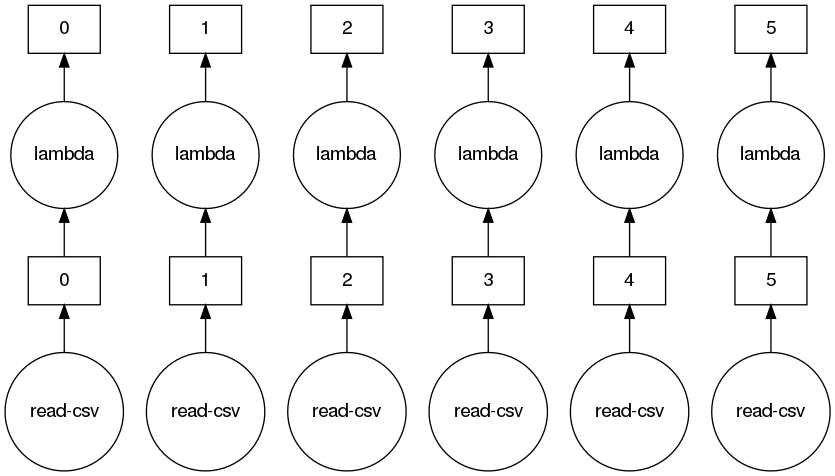

In [21]:
res.visualize()

In [22]:
client.shutdown()

2023-03-09 13:56:04,683 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
